# Regresja liniowa

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

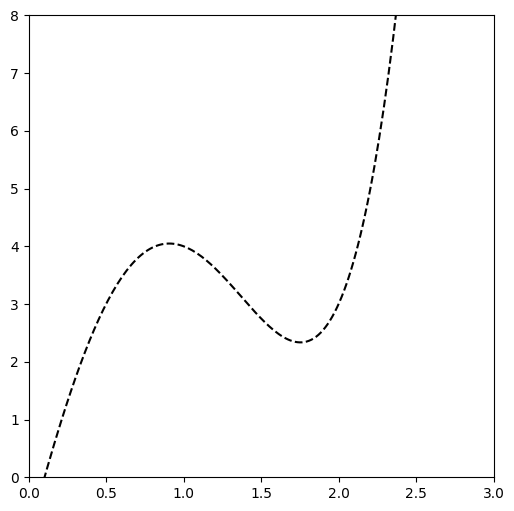

In [3]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k')
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej presykcji.

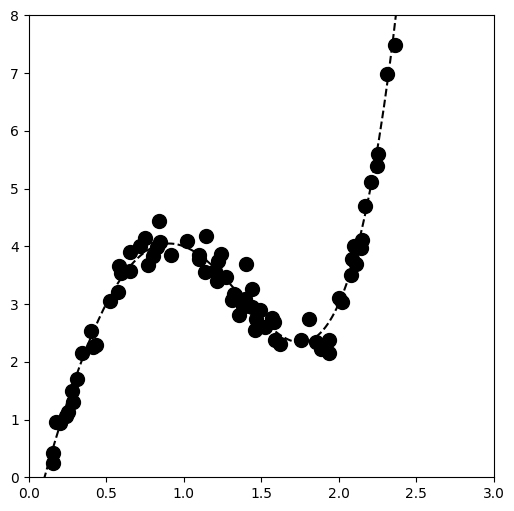

In [4]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.
My narazie urzyjemy metody opartej na rozwiązaniu układu równań liniowych.

In [5]:
M1 = np.vstack( (np.ones_like(x), x) ).T
p1 = np.linalg.lstsq(M1, y, rcond=None)

Definiujemy naszą funkcję regresji

In [6]:
f_lr_1 = lambda x: p1[0][1] * x +p1[0][0]

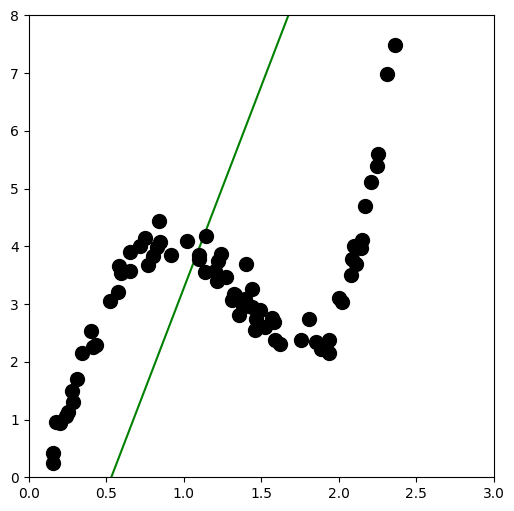

In [7]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_1(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [8]:
M2 = np.vstack( (np.ones_like(x), x, x**2) ).T
p2 = np.linalg.lstsq(M2, y, rcond=None)

Definiujemy naszą funkcję regresji

In [9]:
f_lr_2 = lambda x: p2[0][2]*pow(x,2) + p2[0][1] * x + p2[0][0] 

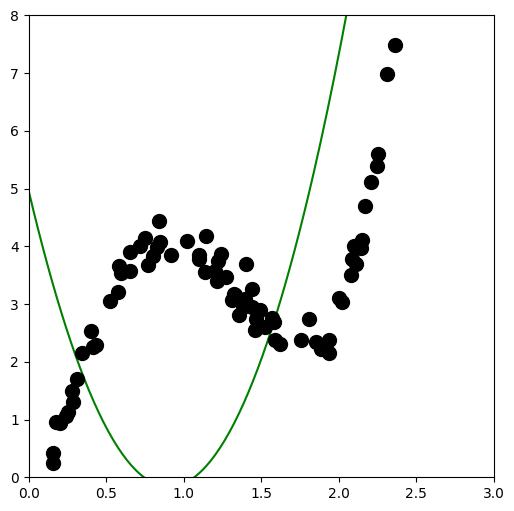

In [10]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_2(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x_original = np.linspace(0, 3, 100)
y_original = f(x_original) + stats.norm(0, 0.2).rvs(len(x_original))

poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_features_3.fit_transform(x_original.reshape(-1, 1))
model_3 = LinearRegression().fit(X_poly_3, y_original)

PolynomialFeatures(degree=3)


# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [12]:
poly_features_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_features_4.fit_transform(x_original.reshape(-1, 1))
model_4 = LinearRegression().fit(X_poly_4, y_original)

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + a_5 \cdot x^5 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [13]:
poly_features_5 = PolynomialFeatures(degree=5)
X_poly_5 = poly_features_5.fit_transform(x_original.reshape(-1, 1))
model_5 = LinearRegression().fit(X_poly_5, y_original)

# Zadanie
Narysuj wszystkie wyniki na jednym wykresie.

## Która z krzywych jest najleprza?

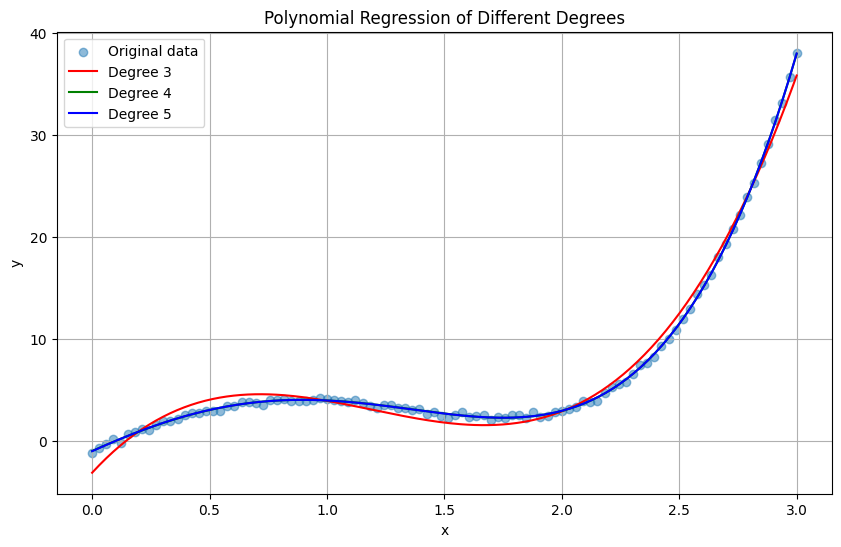

(0.6502173055523454, 0.032945779204059035, 0.03288441131933932)

In [14]:
x_range = np.linspace(0, 3, 200)


y_pred_3 = model_3.predict(poly_features_3.transform(x_range.reshape(-1, 1)))
y_pred_4 = model_4.predict(poly_features_4.transform(x_range.reshape(-1, 1)))
y_pred_5 = model_5.predict(poly_features_5.transform(x_range.reshape(-1, 1)))

plt.figure(figsize=(10, 6))
plt.scatter(x_original, y_original, label="Original data", alpha=0.5)
plt.plot(x_range, y_pred_3, label="Degree 3", color="red")
plt.plot(x_range, y_pred_4, label="Degree 4", color="green")
plt.plot(x_range, y_pred_5, label="Degree 5", color="blue")
plt.title("Polynomial Regression of Different Degrees")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import mean_squared_error

mse_deg3 = mean_squared_error(y_original, model_3.predict(X_poly_3))
mse_deg4 = mean_squared_error(y_original, model_4.predict(X_poly_4))
mse_deg5 = mean_squared_error(y_original, model_5.predict(X_poly_5))

mse_deg3, mse_deg4, mse_deg5

# Zadanie
Musimy mieć jakąś miarę oceny.

In [15]:
import statsmodels.api as sm
Res1 = sm.OLS(y, M1).fit()
Res2 = sm.OLS(y, M2).fit()

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
print(Res1.summary2())
print(".....................................")
print(".....................................")
print(".....................................")
print(Res2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.560   
Dependent Variable: y                AIC:                648.8898
Date:               2024-04-09 17:06 BIC:                654.1001
No. Observations:   100              Log-Likelihood:     -322.44 
Df Model:           1                F-statistic:        127.1   
Df Residuals:       98               Prob (F-statistic): 2.12e-19
R-squared:          0.565            Scale:              37.759  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     -3.8400     1.1987   -3.2033   0.0018   -6.2189   -1.4611
x1         7.4220     0.6583   11.2753   0.0000    6.1158    8.7283
-----------------------------------------------------------------
Omnibus:              12.860       Durbin-Watson:          1.980 
Prob(Omnibus):   

# Zadanie
Analogiczne wyniki możemy izusklać za pomocą prostego kodu.

In [ ]:
import statsmodels.formula.api as smf
# Turn the data into a pandas DataFrame, so that we
# can address them in the formulas with their name
df = pd.DataFrame({'x':x, 'y':y})

# Fit the models, and show the results
Res1F = smf.ols('y~x', df).fit()
Res2F = smf.ols('y ~ x+I(x**2)', df).fit()

In [ ]:
print(Res1F.summary())
print(".....................................")
print(".....................................")
print(".....................................")
print(Res2F.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     127.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.12e-19
Time:                        17:06:19   Log-Likelihood:                -322.44
No. Observations:                 100   AIC:                             648.9
Df Residuals:                      98   BIC:                             654.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8400      1.199     -3.203      0.0